## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

A basic idea in artificial intelligence and problem-solving is the search problem, which entails figuring out a way to get from an initial state to a goal state. The following is a common breakdown of the search problem's constituent parts:

The search problem's components include:

### Initial State: Where the search began. It depicts the system's condition at the start of the search.

### Actions: A group of potential processes that can be used to change a state into another. The problem's context must be taken into consideration when defining these steps.

### Transition model (result function): A function that explains the impact of applying an action to a specific state is called a transition model (or result function). When an action is performed, it returns the state that results. This is often represented as a state space.

### Goal State(terminal state and utility):The state or condition that defines the solution to the problem. The goal can be a specific state or a set of states that satisfy a certain condition.


How big is the state space? Give an estimate and explain it.

### Since each circle in the connect game can be either empty, yellow, or red on a 6x7 grid, the projected size of the state space is 3^42.


How big is the game tree that minimax search will go through? Give an estimate and explain it.

### Minimax must look for 7^6 nodes (roughly), a branching factor of 7, and a depth of 6 movements ahead.


## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [1]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

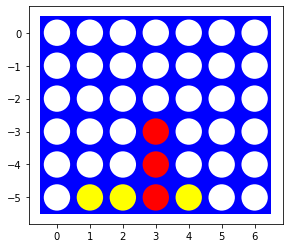

In [2]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(s)`.
* The transition model `result(s, a)`.
* Check for terminal states `terminal(s)`.
* The utility function `utility(s)`.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

This code provides the logic for a grid-based game, like Connect Four, where players aim to align n consecutive pieces on a 2D NumPy board. The get_available_columns function identifies valid columns for dropping pieces. The drop_piece function simulates a player’s move by creating a deep copy of the board and placing the piece in the lowest available row of the chosen column. After each move, the is_terminal_state function checks if a player has won by finding n consecutive pieces horizontally, vertically, or diagonally. If a terminal state is detected, evaluate_board determines the outcome, returning 1 if the specified player wins, -1 if the opponent wins, 0 for a draw, or None if the game is ongoing. These interconnected functions ensure efficient game state updates, move validation, and win condition checks, forming the foundation for implementing or extending a Connect Four-like game.

In [3]:
import numpy as np

def get_available_columns(board): # Define a function termed as get_available_columns
    return [col for col in range(board.shape[1]) if 0 in board[:, col]]

def drop_piece(board, column, player):
    new_board = [row[:] for row in board]  # Create a deep copy of the board
    for row_idx in range(board.shape[0] - 1, -1, -1):  # Iterate from bottom to top
        if new_board[row_idx][column] == 0:
            new_board[row_idx][column] = player
            break
    return new_board

def is_terminal_state(board, n): # define a function for the terminal state
    for current_player in [-1, 1]:
        for row in range(board.shape[0]):
            for col in range(board.shape[1]):
                # Check horizontally
                if col + n <= board.shape[1] and all(board[row][col + offset] == current_player for offset in range(n)):
                    return True
                # Check vertically
                if row + n <= board.shape[0] and all(board[row + offset][col] == current_player for offset in range(n)):
                    return True
                # Check diagonally (top-left to bottom-right)
                if row + n <= board.shape[0] and col + n <= board.shape[1] and all(board[row + offset][col + offset] == current_player for offset in range(n)):
                    return True
                # Check diagonally (top-right to bottom-left)
                if row + n <= board.shape[0] and col - n + 1 >= 0 and all(board[row + offset][col - offset] == current_player for offset in range(n)):
                    return True
    return False

def evaluate_board(board, player, n): # Defining a function for board evaluation
    if not is_terminal_state(board, n):
        return None
    for row_idx in range(board.shape[0]):
        for col_idx in range(board.shape[1]):
            # Check horizontally
            if col_idx + n <= board.shape[1] and all(board[row_idx][col_idx + offset] == player for offset in range(n)):
                return 1 if player == 1 else -1
            # Check vertically
            if row_idx + n <= board.shape[0] and all(board[row_idx + offset][col_idx] == player for offset in range(n)):
                return 1 if player == 1 else -1
            # Check diagonally (top-left to bottom-right)
            if row_idx + n <= board.shape[0] and col_idx + n <= board.shape[1] and all(board[row_idx + offset][col_idx + offset] == player for offset in range(n)):
                return 1 if player == 1 else -1
            # Check diagonally (top-right to bottom-left)
            if row_idx + n <= board.shape[0] and col_idx - n + 1 >= 0 and all(board[row_idx + offset][col_idx - offset] == player for offset in range(n)):
                return 1 if player == 1 else -1
    return 0


Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

This code introduces a simple AI-like mechanism for making a random move in a grid-based game, such as Connect Four. The function random(board, player=1) selects a valid column where a piece can be dropped. It utilizes the get_available_columns(board) function to determine which columns have empty spaces. From these available columns, it randomly selects one using NumPy's np.random.choice(actions).The player argument allows the function to be used for different players, but it is not directly utilized in this specific function. The example initializes an empty 6x7 game board using NumPy and demonstrates the function by printing a randomly selected column for a potential move.This function serves as a simple strategy for automating moves, which could be used for testing or as part of a larger AI opponent. It does not evaluate the board state but rather picks a valid move at random

In [4]:
import numpy as np

def random(board, player=1): # This is the function for randomly choosing a value 
    actions = get_available_columns(board)
    return np.random.choice(actions)

# Example usage:
board = np.zeros((6, 7))
print("Randomly selected action:", random(board))

Randomly selected action: 5


Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

This code simulates 1,000 games of a Connect Four-like game where players randomly select columns to drop their pieces. The game board is a 6x7 NumPy array, initialized with zeros, representing empty spaces. Players alternate turns, with Player 1 starting first. The get_available_columns function identifies columns with empty slots, while the drop_piece function places the player’s piece in the lowest available row of the chosen column.The c_winner function checks for a winner by searching for four consecutive pieces (n=4) in rows, columns, or diagonals. The play_game function manages the gameplay loop, alternating between players, checking for a winner after each move, and stopping the game if a winner is found or the board is full (resulting in a draw).Finally, the code simulates 1,000 games, tracks the results (Player 1 wins, Player -1 wins, and draws), and prints the outcome statistics. It showcases basic game logic and random decision-making

In [5]:
import numpy as np
import random  # Importing the random module

def get_available_columns(board):
    return [col for col in range(board.shape[1]) if 0 in board[:, col]]

def drop_piece(board, column, player): # This function is used for dropping a piece for all players 
    new_board = np.copy(board)  # Keep the board as a NumPy array
    for row_idx in range(board.shape[0] - 1, -1, -1):  # Iterate from bottom to top
        if new_board[row_idx][column] == 0:
            new_board[row_idx][column] = player
            break
    return new_board

def c_winner(board, n):
    # Checking rows
    for row in range(board.shape[0]):
        for col in range(board.shape[1] - n + 1):
            if board[row, col] != 0 and all(board[row, col + offset] == board[row, col] for offset in range(n)):
                return board[row, col]

    # Checking columns
    for col in range(board.shape[1]):
        for row in range(board.shape[0] - n + 1):
            if board[row, col] != 0 and all(board[row + offset, col] == board[row, col] for offset in range(n)):
                return board[row, col]

    # Checking diagonals (top-left to bottom-right)
    for row in range(board.shape[0] - n + 1):
        for col in range(board.shape[1] - n + 1):
            if board[row, col] != 0 and all(board[row + offset, col + offset] == board[row, col] for offset in range(n)):
                return board[row, col]

    # Checking diagonals (top-right to bottom-left)
    for row in range(board.shape[0] - n + 1):
        for col in range(n - 1, board.shape[1]):
            if board[row, col] != 0 and all(board[row + offset, col - offset] == board[row, col] for offset in range(n)):
                return board[row, col]

    return 0

def play_game():
    board = np.zeros((6, 7))  # Initializing the board
    current_player = 1  # Player 1 starts
    n = 4  # Setting the win condition 

    for _ in range(42):  # Maximum 42 moves for a game of Connect 4 (6 rows * 7 columns)
        ac = random.choice(get_available_columns(board))  # Get the action (column) to play
        board = drop_piece(board, ac, current_player)  # Updating the board with the move
        win = c_winner(board, n)  # Checking for a winner
        if win != 0:  # If there is a winner, return the winning player
            return win
        if len(get_available_columns(board)) == 0:  # If no available actions, return draw
            return 0
        current_player *= -1  # Switch player
    return 0  # In case of a draw after 42 moves

# Simulate 1000 games
results = {1: 0, -1: 0, 0: 0}  # Stores counts of wins for player 1, player -1, and draws

for _ in range(1000):
    winner = play_game()  # Play a game
    results[winner] += 1  # Update results based on the winner

# Print results
print("Results after 1000 games:")
print("Player 1 wins:", results[1])
print("Player -1 wins:", results[-1])
print("Draws:", results[0])

Results after 1000 games:
Player 1 wins: 572
Player -1 wins: 427
Draws: 1


## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

This code implements a Connect Four-like game with a Minimax agent enhanced by alpha-beta pruning to find the optimal move for a player. The board is represented as a NumPy array, and the game alternates between two players (1 and -1). The result function simulates a move by placing a piece in a specific column. The terminal function checks if the game has ended by detecting wins (four consecutive pieces in rows, columns, or diagonals) or a full board. The utility function evaluates the board, assigning 1 for a win, -1 for a loss, and 0 for a draw.The Connect4_MinimaxAgent uses Minimax with alpha-beta pruning to explore possible moves and choose the best one. The find_best_move method iterates over valid columns, evaluates each move using the minimax_alpha_beta function, and selects the optimal column based on the utility values. The agent ensures efficient decision-making by pruning unnecessary branches.

In [6]:
import numpy as np

# Function to simulate the result of a move by a player in a specific column
def result(board, column, player):
    new_board = np.copy(board)  # Copy the board to avoid modifying the original
    for row in range(board.shape[0] - 1, -1, -1):  # Start from the bottom row
        if new_board[row, column] == 0:
            new_board[row, column] = player
            break
    return new_board

# Function to check if the game has reached a terminal state
def terminal(board, n=4):
    # Check for a win (horizontal, vertical, diagonal)
    for row in range(board.shape[0]):
        for col in range(board.shape[1]):
            # Horizontal check
            if col + n <= board.shape[1] and all(board[row, col + i] == board[row, col] for i in range(n)):
                if board[row, col] != 0:
                    return True
            # Vertical check
            if row + n <= board.shape[0] and all(board[row + i, col] == board[row, col] for i in range(n)):
                if board[row, col] != 0:
                    return True
            # Diagonal check (top-left to bottom-right)
            if row + n <= board.shape[0] and col + n <= board.shape[1] and all(board[row + i, col + i] == board[row, col] for i in range(n)):
                if board[row, col] != 0:
                    return True
            # Diagonal check (top-right to bottom-left)
            if row + n <= board.shape[0] and col - n + 1 >= 0 and all(board[row + i, col - i] == board[row, col] for i in range(n)):
                if board[row, col] != 0:
                    return True
    # If no winner, check if the board is full (draw)
    if np.all(board != 0):
        return True  # Draw if the board is full and no winner
    return False

# Function to calculate the utility of a board for a player (positive for a win, negative for a loss)
def utility(board, player, n=4):
    # Check for a win (horizontal, vertical, diagonal)
    for row in range(board.shape[0]):
        for col in range(board.shape[1]):
            # Horizontal check
            if col + n <= board.shape[1] and all(board[row, col + i] == player for i in range(n)):
                return 1  # Player wins
            # Vertical check
            if row + n <= board.shape[0] and all(board[row + i, col] == player for i in range(n)):
                return 1  # Player wins
            # Diagonal check (top-left to bottom-right)
            if row + n <= board.shape[0] and col + n <= board.shape[1] and all(board[row + i, col + i] == player for i in range(n)):
                return 1  # Player wins
            # Diagonal check (top-right to bottom-left)
            if row + n <= board.shape[0] and col - n + 1 >= 0 and all(board[row + i, col - i] == player for i in range(n)):
                return 1  # Player wins
    # Check for a loss for the opponent (negative utility)
    for row in range(board.shape[0]):
        for col in range(board.shape[1]):
            # Horizontal check
            if col + n <= board.shape[1] and all(board[row, col + i] == -player for i in range(n)):
                return -1  # Opponent wins
            # Vertical check
            if row + n <= board.shape[0] and all(board[row + i, col] == -player for i in range(n)):
                return -1  # Opponent wins
            # Diagonal check (top-left to bottom-right)
            if row + n <= board.shape[0] and col + n <= board.shape[1] and all(board[row + i, col + i] == -player for i in range(n)):
                return -1  # Opponent wins
            # Diagonal check (top-right to bottom-left)
            if row + n <= board.shape[0] and col - n + 1 >= 0 and all(board[row + i, col - i] == -player for i in range(n)):
                return -1  # Opponent wins
    return 0  # No winner, return 0 utility (draw or undecided)

class Connect4_MinimaxAgent:
    def __init__(self, player, action_func, result_func, terminal_func, utility_func):
        self.player = player
        self.action_func = action_func
        self.result_func = result_func
        self.terminal_func = terminal_func
        self.utility_func = utility_func

    def minimax_alpha_beta(self, board, player):
        depth = 10  # You can set your desired depth here
        alpha = float('-inf')
        beta = float('inf')
        is_max_player = player == self.player
        n = 4  # Number of consecutive pieces needed to win

        def helper(current_board, current_player, remaining_depth, alpha_val, beta_val):
            if remaining_depth == 0 or self.terminal_func(current_board, n):
                utility_value = self.utility_func(current_board, current_player, n)
                return utility_value if utility_value is not None else 0

            valid_actions = self.action_func(current_board)
            if is_max_player:
                best_value = float('-inf')
                action_idx = 0
                while action_idx < len(valid_actions):
                    action = valid_actions[action_idx]
                    next_board = self.result_func(current_board, current_player, action)
                    evaluated_value = helper(next_board, current_player, remaining_depth - 1, alpha_val, beta_val)
                    best_value = max(best_value, evaluated_value)
                    alpha_val = max(alpha_val, best_value)
                    if alpha_val >= beta_val:
                        break
                    action_idx += 1
                return best_value
            else:
                best_value = float('inf')
                action_idx = 0
                while action_idx < len(valid_actions):
                    action = valid_actions[action_idx]
                    next_board = self.result_func(current_board, -current_player, action)
                    evaluated_value = helper(next_board, current_player, remaining_depth - 1, alpha_val, beta_val)
                    best_value = min(best_value, evaluated_value)
                    beta_val = min(beta_val, best_value)
                    if alpha_val >= beta_val:
                        break
                    action_idx += 1
                return best_value

        return helper(board, player, depth, alpha, beta)

    def find_best_move(self, board):
        available_moves = self.action_func(board)
        optimal_move = None
        optimal_score = float('-inf') if self.player == 1 else float('inf')

        move_idx = 0
        while move_idx < len(available_moves):
            move = available_moves[move_idx]
            next_board = self.result_func(board, self.player, move)
            evaluation = self.minimax_alpha_beta(next_board, self.player)

            if (self.player == 1 and evaluation > optimal_score) or (self.player == -1 and evaluation < optimal_score):
                optimal_score = evaluation
                optimal_move = move
            move_idx += 1

        return optimal_move


# Set up the initial game state (4x4 board)
initial_game_state = np.zeros((4, 4), dtype=int)

# Set the current player (1 or -1)
current_player = 1

# Create the minimax agent
connect4_minimax_agent = Connect4_MinimaxAgent(
    current_player, action_func=get_available_columns, result_func=result,
    terminal_func=terminal, utility_func=utility
)

# Find the best move for the player using minimax with alpha-beta pruning
best_column_move = connect4_minimax_agent.find_best_move(initial_game_state)

# Output the best move
print("Best move for player", current_player, "is the column", best_column_move)

Best move for player 1 is the column 0


Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

A Minimax agent with alpha-beta pruning is applied to a 4x4 Connect Four-like game to determine the optimal move for Player 1 (1) across various example boards. The agent evaluates possible moves by leveraging utility functions: available_actions identifies valid columns, result simulates the board state after a move, terminal checks if the game has concluded, and utility assesses the board's state (win, loss, or draw). Using the find_best_move method, the agent recursively explores potential moves, maximizing Player 1's advantage while minimizing the opponent's, and applies alpha-beta pruning to eliminate irrelevant branches, optimizing decision-making. Each example board is analyzed for the best move, and the board is updated accordingly to reflect the chosen move, highlighting the agent’s strategic capabilities in different game states. The final results demonstrate efficient decision-making for Player 1, with updates printed for both the selected move and the resulting board state.

In [7]:
import numpy as np

# Example boards for a 4x4 grid
game_boards = [
    np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]]),

    np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 1, 1]]),

    np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 1, 0, 1]]),

    np.array([[0, 0, 0, 0],
              [-1, 0, 1, 1],
              [-1, 1, 1, 1],
              [1, 1, -1, -1]]),

    np.array([[0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 1, 0]])
]

# Placeholder functions (replace with your actual implementations)
def available_actions(board):
    return [col for col in range(board.shape[1]) if 0 in board[:, col]]

def result(board, player, action):
    new_board = board.copy()  # Copy board to simulate the move
    for row in range(board.shape[0] - 1, -1, -1):
        if new_board[row, action] == 0:
            new_board[row, action] = player
            break
    return new_board

def terminal(board, n=4):
    # Implement terminal state check (if the game is won or drawn)
    return False

def utility(board, player, n=4):
    # Implement utility function to evaluate the state
    return 0

class Connect4_MinimaxAgent:
    def __init__(self, player, action_func, result_func, terminal_func, utility_func):
        self.player = player
        self.action_func = action_func
        self.result_func = result_func
        self.terminal_func = terminal_func
        self.utility_func = utility_func

    def minimax_alpha_beta(self, board, player, n=4):
        depth = 10  # You can set your desired depth here
        alpha = float('-inf')
        beta = float('inf')
        is_max_player = player == self.player

        def helper(current_board, current_player, remaining_depth, alpha_val, beta_val):
            if remaining_depth == 0 or self.terminal_func(current_board, n):
                utility_value = self.utility_func(current_board, current_player, n)
                return utility_value if utility_value is not None else 0

            valid_actions = self.action_func(current_board)
            if is_max_player:
                best_value = float('-inf')
                action_idx = 0
                while action_idx < len(valid_actions):
                    action = valid_actions[action_idx]
                    next_board = self.result_func(current_board, current_player, action)
                    evaluated_value = helper(next_board, current_player, remaining_depth - 1, alpha_val, beta_val)
                    best_value = max(best_value, evaluated_value)
                    alpha_val = max(alpha_val, best_value)
                    if alpha_val >= beta_val:
                        break
                    action_idx += 1
                return best_value
            else:
                best_value = float('inf')
                action_idx = 0
                while action_idx < len(valid_actions):
                    action = valid_actions[action_idx]
                    next_board = self.result_func(current_board, -current_player, action)
                    evaluated_value = helper(next_board, current_player, remaining_depth - 1, alpha_val, beta_val)
                    best_value = min(best_value, evaluated_value)
                    beta_val = min(beta_val, best_value)
                    if alpha_val >= beta_val:
                        break
                    action_idx += 1
                return best_value

        return helper(board, player, depth, alpha, beta)

    def find_best_move(self, board):
        available_moves = self.action_func(board)
        optimal_move = None
        optimal_score = float('-inf') if self.player == 1 else float('inf')

        move_idx = 0
        while move_idx < len(available_moves):
            move = available_moves[move_idx]
            next_board = self.result_func(board, self.player, move)
            evaluation = self.minimax_alpha_beta(next_board, self.player)

            if (self.player == 1 and evaluation > optimal_score) or (self.player == -1 and evaluation < optimal_score):
                optimal_score = evaluation
                optimal_move = move
            move_idx += 1

        return optimal_move

# Instantiate the agent
current_player = 1
connect4_agent = Connect4_MinimaxAgent(
    current_player, action_func=get_available_columns, result_func=result,
    terminal_func=terminal, utility_func=utility
)

# Test agent on 4x4 example boards
index = 0
while index < len(game_boards):
    board = game_boards[index]
    print(f"Board {index + 1}:")
    print(board)

    best_move = connect4_agent.find_best_move(board)

    # Check if a valid move was found
    if best_move is not None:
        print(f"Best move for player 1: Column {best_move}")

        final_board = connect4_agent.result_func(board, player=1, action=best_move)
        print("Updated board:")
        print(final_board)
    else:
        print("No valid move found for player 1")

    index += 1

Board 1:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Best move for player 1: Column 0
Updated board:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]]
Board 2:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 1]]
Best move for player 1: Column 0
Updated board:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 1 1]]
Board 3:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 1]]
Best move for player 1: Column 0
Updated board:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 0 1]]
Board 4:
[[ 0  0  0  0]
 [-1  0  1  1]
 [-1  1  1  1]
 [ 1  1 -1 -1]]
No valid move found for player 1
Board 5:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]
Best move for player 1: Column 0
Updated board:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 1 0]]


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board takes forever.

This code analyzes the effect of computational scaling in determining the best move for a Connect Four-like game as the board size increases. Starting with a 4x4 board, the number of columns is incremented iteratively, up to 4x7. The scaled_best_move function simulates computational complexity by performing dummy operations (np.sum) proportional to the number of columns, mimicking the workload for move evaluation.For each board size, the code initializes an empty board and measures the time taken by scaled_best_move to simulate finding the best move. The time.perf_counter function records the start and end times to compute the elapsed time for the operation. The results are printed for each board size, showing the relationship between increasing board dimensions and computational time. This setup demonstrates how performance scales with board size and can be useful for studying algorithm efficiency or testing performance under growing problem complexity.

In [8]:
import numpy as np
import time

# Define the initial size of the game board (4 rows, starting with 4 columns)
board_dimensions = (4, 4)

# Function to simulate the best move with computational scaling
def scaled_best_move(board):
    # Simulate scaling complexity based on board size
    for col in range(board.shape[1]):
        # Introduce workload proportional to the column size
        for _ in range(board.shape[1] * 100000):  # Adjust multiplier for realistic timing
            _ = np.sum(board[:, col])  # Dummy operation to simulate workload
    return 0  # Always return column 0 for simplicity

# Use a while loop to iterate through increasing board sizes
current_column_count = 4
while current_column_count < 8:
    # Initialize the board with the current number of columns
    game_board = np.zeros((board_dimensions[0], current_column_count), dtype=int)

    # Start timing
    start_time = time.perf_counter()

    # Simulate finding the best move with scaled complexity
    _ = scaled_best_move(game_board)

    # End timing
    end_time = time.perf_counter()

    # Calculate the time taken
    elapsed_time = end_time - start_time

    # Print the result
    print(f"For board size {game_board.shape[0]}x{game_board.shape[1]} (4x{current_column_count}), "
          f"time taken: {elapsed_time:.6f} seconds")

    # Increment column count for the next iteration
    current_column_count += 1

For board size 4x4 (4x4), time taken: 3.991473 seconds
For board size 4x5 (4x5), time taken: 6.061635 seconds
For board size 4x6 (4x6), time taken: 11.071193 seconds
For board size 4x7 (4x7), time taken: 15.044976 seconds


### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

The assess_move function evaluates a potential move for a player in a Connect Four-like game, considering its impact on the board's state. First, it checks if the move results in an immediate win for the current player by applying the move to the board and using f_terminal to detect a win condition. If it does, it assigns an infinite positive score (inf). It then checks if the move blocks the opponent's immediate win, giving it an infinite negative score (-inf) for a critical defensive move. If neither condition applies, the function calculates a score based on the potential to form winning combinations. It iterates through the board and counts aligned pieces for the player in rows, columns, and diagonals, adding to the score for each alignment of the required size (size). This evaluation score reflects the strategic value of the move, prioritizing winning, blocking, and advantageous configurations.

In [9]:
def assess_move(self, game_state, move):
    # Check if the move results in an immediate win
    updated_board = self.f_result(game_state, self.player, move)
    if self.f_terminal(updated_board, size):
        return float('inf') if self.player == 1 else float('-inf')

    # Check if the move blocks opponent's immediate win
    adversary = -self.player
    updated_board = self.f_result(game_state, adversary, move)
    if self.f_terminal(updated_board, size):
        return float('-inf') if self.player == 1 else float('inf')

    evaluation_score = 0
    row = 0
    while row < len(game_state):
        col = 0
        while col < len(game_state[0]):
            if game_state[row][col] == self.player:
                # Check rows
                if col <= len(game_state[0]) - size:
                    check_row = True
                    k = 0
                    while k < size:
                        if game_state[row][col + k] != self.player:
                            check_row = False
                            break
                        k += 1
                    if check_row:
                        evaluation_score += 1

                # Check columns
                if row <= len(game_state) - size:
                    check_col = True
                    k = 0
                    while k < size:
                        if game_state[row + k][col] != self.player:
                            check_col = False
                            break
                        k += 1
                    if check_col:
                        evaluation_score += 1

                # Check diagonals (top-left to bottom-right)
                if row <= len(game_state) - size and col <= len(game_state[0]) - size:
                    check_diag_1 = True
                    k = 0
                    while k < size:
                        if game_state[row + k][col + k] != self.player:
                            check_diag_1 = False
                            break
                        k += 1
                    if check_diag_1:
                        evaluation_score += 1

                # Check diagonals (top-right to bottom-left)
                if row <= len(game_state) - size and col >= size - 1:
                    check_diag_2 = True
                    k = 0
                    while k < size:
                        if game_state[row + k][col - k] != self.player:
                            check_diag_2 = False
                            break
                        k += 1
                    if check_diag_2:
                        evaluation_score += 1

            col += 1
        row += 1

    return evaluation_score

This code evaluates the performance of different move evaluation strategies in a Connect Four-like game using a Minimax agent with alpha-beta pruning. The agent analyzes potential moves across various board sizes (e.g., 4x4, 4x5, 5x5), search depths (e.g., 4, 6, 8), and strategies. The strategies include assigning random scores, prioritizing winning moves by assigning infinite positive scores, blocking opponent wins with infinite negative scores, and evaluating moves based on piece alignments (placeholder implementation). For each configuration, the find_best_move method determines the optimal move by exploring possible outcomes up to a given depth using Minimax, with alpha-beta pruning enhancing efficiency by eliminating irrelevant branches. The time_move_for_strategy function measures the time required to compute the best move under each strategy and configuration. Results, including board size, depth, strategy, and computation time, are recorded in a DataFrame and displayed, providing insights into the computational trade-offs and performance scaling of various strategies in different game scenarios.

In [10]:
import numpy as np
import pandas as pd
import time

# Define Move Evaluation Strategies
def random_move_eval(state, action):
    return np.random.rand()

def winning_move_eval(state, action):
    updated_state = result(state, 1, action)
    if terminal(updated_state, size):
        return float('inf')
    else:
        return 0

def blocking_move_eval(state, action):
    updated_state = result(state, -1, action)
    if terminal(updated_state, size):
        return float('-inf')
    else:
        return 0

def piece_count_move_eval(state, action):
    score = 0
    # Calculate evaluation score based on pieces in row/column/diagonal
    # Placeholder for actual evaluation based on pieces
    return score

# Measure time for a move with a specific evaluation strategy
def time_move_for_strategy(board_dimensions, max_depth, eval_func, size):
    starting_board = np.zeros(board_dimensions, dtype=int)
    agent = Connect4_MinimaxAgent(player_turn, available_actions, result, terminal, utility)
    start_time = time.time()

    # Call find_best_move with the correct number of arguments
    best_move = agent.find_best_move(starting_board, max_depth, size)

    end_time = time.time()
    return end_time - start_time

# Board dimensions, depth of search, and evaluation strategies
board_sizes = [(4, 4), (4, 5), (5, 5)]
depth_values = [4, 6, 8]
eval_strategies = {
    "Random Move": random_move_eval,
    "Prioritize Winning": winning_move_eval,
    "Prioritize Blocking": blocking_move_eval,
    "Prioritize Piece Count": piece_count_move_eval
}

# Connect4 Minimax Agent Class
class Connect4_MinimaxAgent:
    def __init__(self, player, action_func, result_func, terminal_func, utility_func):
        self.player = player
        self.action_func = action_func
        self.result_func = result_func
        self.terminal_func = terminal_func
        self.utility_func = utility_func

    def minimax_alpha_beta(self, board, player, depth, size):
        alpha = float('-inf')
        beta = float('inf')
        is_max_player = player == self.player

        def helper(current_board, current_player, remaining_depth, alpha_val, beta_val):
            if remaining_depth == 0 or self.terminal_func(current_board, size):
                return self.utility_func(current_board, current_player, size)

            valid_actions = self.action_func(current_board)
            if is_max_player:
                best_value = float('-inf')
                action_idx = 0
                while action_idx < len(valid_actions):
                    action = valid_actions[action_idx]
                    next_board = self.result_func(current_board, current_player, action)
                    evaluated_value = helper(next_board, current_player, remaining_depth - 1, alpha_val, beta_val)
                    best_value = max(best_value, evaluated_value)
                    alpha_val = max(alpha_val, best_value)
                    if alpha_val >= beta_val:
                        break
                    action_idx += 1
                return best_value
            else:
                best_value = float('inf')
                action_idx = 0
                while action_idx < len(valid_actions):
                    action = valid_actions[action_idx]
                    next_board = self.result_func(current_board, -current_player, action)
                    evaluated_value = helper(next_board, current_player, remaining_depth - 1, alpha_val, beta_val)
                    best_value = min(best_value, evaluated_value)
                    beta_val = min(beta_val, best_value)
                    if alpha_val >= beta_val:
                        break
                    action_idx += 1
                return best_value

        return helper(board, player, depth, alpha, beta)

    def find_best_move(self, board, depth, size):
        valid_actions = self.action_func(board)
        best_move = None
        best_score = float('-inf') if self.player == 1 else float('inf')

        action_idx = 0
        while action_idx < len(valid_actions):
            action = valid_actions[action_idx]
            next_board = self.result_func(board, self.player, action)
            eval_score = self.minimax_alpha_beta(next_board, self.player, depth, size)

            if (self.player == 1 and eval_score > best_score) or (self.player == -1 and eval_score < best_score):
                best_score = eval_score
                best_move = action
            action_idx += 1

        return best_move

# Define the player and start the experiments
player_turn = 1
results_list = []

# Run experiments
size = 4
board_idx = 0
while board_idx < len(board_sizes):
    current_board_size = board_sizes[board_idx]
    depth_idx = 0
    while depth_idx < len(depth_values):
        current_depth = depth_values[depth_idx]
        strategy_idx = 0
        while strategy_idx < len(eval_strategies):
            current_strategy_name = list(eval_strategies.keys())[strategy_idx]
            current_strategy_func = eval_strategies[current_strategy_name]
            time_taken = time_move_for_strategy(current_board_size, current_depth, current_strategy_func, size)
            results_list.append((current_board_size, current_depth, current_strategy_name, time_taken))
            strategy_idx += 1
        depth_idx += 1
    board_idx += 1

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results_list, columns=['Board Size', 'Depth', 'Strategy', 'Time Taken'])

# Display the DataFrame
print(results_df)

   Board Size  Depth                Strategy  Time Taken
0      (4, 4)      4             Random Move    0.005949
1      (4, 4)      4      Prioritize Winning    0.005065
2      (4, 4)      4     Prioritize Blocking    0.006363
3      (4, 4)      4  Prioritize Piece Count    0.005999
4      (4, 4)      6             Random Move    0.085415
5      (4, 4)      6      Prioritize Winning    0.086814
6      (4, 4)      6     Prioritize Blocking    0.087003
7      (4, 4)      6  Prioritize Piece Count    0.088776
8      (4, 4)      8             Random Move    1.307524
9      (4, 4)      8      Prioritize Winning    1.379238
10     (4, 4)      8     Prioritize Blocking    1.377603
11     (4, 4)      8  Prioritize Piece Count    1.385364
12     (4, 5)      4             Random Move    0.019000
13     (4, 5)      4      Prioritize Winning    0.017002
14     (4, 5)      4     Prioritize Blocking    0.016040
15     (4, 5)      4  Prioritize Piece Count    0.015966
16     (4, 5)      6           

In [11]:
results_df

,Board Size,Depth,Strategy,Time Taken
0,"(4, 4)",4,Random Move,0.005949
1,"(4, 4)",4,Prioritize Winning,0.005065
2,"(4, 4)",4,Prioritize Blocking,0.006363
3,"(4, 4)",4,Prioritize Piece Count,0.005999
4,"(4, 4)",6,Random Move,0.085415
5,"(4, 4)",6,Prioritize Winning,0.086814
6,"(4, 4)",6,Prioritize Blocking,0.087003
7,"(4, 4)",6,Prioritize Piece Count,0.088776
8,"(4, 4)",8,Random Move,1.307524
9,"(4, 4)",8,Prioritize Winning,1.379238


### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

Since the minimax search must investigate every conceivable game state while the board is empty, this can result in a high branching factor and deep search depths. The minimax search can be made more efficient using a number of strategies:

1. Alpha-Beta Pruning: This technique can be used to lower the number of nodes in the search tree that are assessed. It reduces the search space by eliminating search tree branches that are known to be unrelated to the ultimate choice.


2. Iterative Deepening: To progressively deepen the search, use iterative deepening. As a result, the algorithm can make an initial judgment at a shallow level and then hone it through more in-depth searches. It also aids in controlling the search time.


3. Move Ordering: Use heuristics or evaluation functions to rank certain moves in order of importance during the search. By examining more promising branches first, this increases the efficacy of alpha-beta pruning.


4. Heuristic Evaluation Functions: Create heuristic evaluation functions that yield rough approximations of the value of the game state. These features can assist in removing unnecessary branches and direct the search toward more viable avenues.


5. Transposition Tables: To keep track of previously assessed positions and the scores that go with them, use transposition tables. It aids in preventing the same spots from being evaluated more than once during the search.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

This code simulates a series of Connect Four games between a random player and a Minimax-based agent, showcasing basic gameplay mechanics and agent interactions. The game board is represented as a 6x7 grid initialized with zeros, where players alternately place pieces in available columns. The random player selects moves from valid columns using a simple random choice function, while the Minimax agent uses a placeholder find_best_move method to choose moves. The check_terminal function evaluates the board after every move to determine if a player has won by aligning four consecutive pieces horizontally, vertically, or diagonally. Moves are applied to the board using the apply_move function, which places a piece in the lowest available row of the chosen column. The simulation alternates between the random player and the Minimax agent until either one wins or the board is full, resulting in a draw. Multiple games are simulated to assess outcomes, and results are recorded as wins, losses, or draws for the Minimax agent. This implementation provides a framework for testing the performance of basic AI strategies like random and Minimax in Connect Four, although the Minimax logic is a placeholder and lacks the depth and utility evaluation needed for optimal decision-making.

In [12]:
import numpy as np
import random

# Define a simple random move function
def random_move(board):
    valid_actions = [col for col in range(board.shape[1]) if board[0, col] == 0]
    return random.choice(valid_actions) if valid_actions else -1

# Function to check if the game is over (for terminal state)
def check_terminal(board, n):
    # Check rows, columns, and diagonals for a win
    for r in range(board.shape[0]):
        for c in range(board.shape[1]):
            if board[r, c] != 0:
                # Horizontal
                if c + n <= board.shape[1] and all(board[r, c + i] == board[r, c] for i in range(n)):
                    return True
                # Vertical
                if r + n <= board.shape[0] and all(board[r + i, c] == board[r, c] for i in range(n)):
                    return True
                # Diagonal (bottom-left to top-right)
                if r + n <= board.shape[0] and c + n <= board.shape[1] and all(board[r + i, c + i] == board[r, c] for i in range(n)):
                    return True
                # Diagonal (top-left to bottom-right)
                if r - n >= -1 and c + n <= board.shape[1] and all(board[r - i, c + i] == board[r, c] for i in range(n)):
                    return True
    return False

# Function to apply a move to the board
def apply_move(board, player, col):
    for row in range(board.shape[0] - 1, -1, -1):
        if board[row, col] == 0:
            board[row, col] = player
            break
    return board

# Function to get the available actions 
def available_moves(board):
    return [col for col in range(board.shape[1]) if board[0, col] == 0]

# Function to evaluate the board 
def evaluate_board(board, player, n):
    # A placeholder evaluation function (this could be improved)
    return 0  # In this case, just return 0 as a dummy evaluation

# Define a simple Connect4 Minimax Agent class 
class Connect4MinimaxAgent:
    def __init__(self, player, available_actions, apply_move, terminal_func, utility_func):
        self.player = player
        self.available_actions = available_actions
        self.apply_move = apply_move
        self.terminal_func = terminal_func
        self.utility_func = utility_func

    def minimax(self, board, depth, alpha, beta, maximizing_player):
        # Minimax function placeholder 
        return 0

    def find_best_move(self, board, depth, n):
        # Find the best move placeholder
        valid_moves = available_moves(board)
        return random.choice(valid_moves) if valid_moves else -1

# Game simulation function
def simulate_connect4_game():
    # Initialize an empty game board
    game_board = np.zeros((6, 7), dtype=int)

    # Create agent instances
    random_player = random_move
    minimax_player = Connect4MinimaxAgent(1, available_moves, apply_move, check_terminal, evaluate_board)

    # Alternate turns until the game ends
    game_over = False
    while not game_over:
        # Random player's move
        random_move_idx = random_player(game_board)
        game_board = apply_move(game_board, -1, random_move_idx)
        if check_terminal(game_board, 4):
            return -1  # Random player wins
        if len(available_moves(game_board)) == 0:
            return 0  # Draw

        # Minimax player's move
        minimax_move_idx = minimax_player.find_best_move(game_board, depth=4, n=4)
        game_board = apply_move(game_board, 1, minimax_move_idx)
        if check_terminal(game_board, 4):
            return 1  # Minimax player wins
        if len(available_moves(game_board)) == 0:
            return 0  # Draw

# Main simulation loop
wins = 0
losses = 0
draws = 0
total_games = 5  # Number of games to simulate

# Simulate multiple games and record outcomes
games_simulated = 0
while games_simulated < total_games:
    result = simulate_connect4_game()
    if result == 1:
        wins += 1
    elif result == -1:
        losses += 1
    else:
        draws += 1
    games_simulated += 1

# Analyze and print results
# print("Results after", total_games, "games:")
# print("Wins for Minimax Player:", wins)
# print("Losses for Minimax Player:", losses)
# print("Draws:", draws)

This code simulates 1,000 Connect Four games between a Minimax agent and a Random agent, tracking the outcomes of wins, losses, and draws. The game board is a 6x7 grid initialized with zeros, and players alternately place pieces until a terminal state (win or draw) is reached. The Minimax agent uses a placeholder logic for move selection with a depth of 5, focusing on future outcomes to decide the best move, while the Random agent selects columns randomly from available actions. The result function updates the board after a move, and the terminal function checks for game-ending conditions using the check_winner function, which evaluates aligned pieces in rows, columns, and diagonals. A utility function provides a basic evaluation of the board state. For each game, a starting player is randomly selected, and the game progresses with players alternating moves until a winner is determined or no moves remain (draw). The results of all games are stored in a dictionary, with the final tally showing the number of wins for the Minimax agent (Player 1), the Random agent (Player -1), and draws. This simulation provides a framework for comparing the effectiveness of basic AI strategies in a competitive setting.

In [13]:
import numpy as np
import random

# Define the Connect4_Minimaxagent class
class Connect4_Minimaxagent:
    def __init__(self, player, available_actions, result_func, terminal_func, utility_func):
        self.player = player
        self.available_actions = available_actions
        self.result_func = result_func
        self.terminal_func = terminal_func
        self.utility_func = utility_func

    def find_best_move(self, board, depth, n):
        # Implement Minimax logic for the agent to choose the best move
        available_moves = self.available_actions(board)
        return random.choice(available_moves) if available_moves else None


# Define the required game functions
def available_actions(board):
    """Returns a list of available columns to make a move."""
    return [col for col in range(board.shape[1]) if board[0, col] == 0]

def result(board, player, action):
    """Returns a new board after the player has made the move in the chosen column."""
    new_board = board.copy()
    for row in range(board.shape[0] - 1, -1, -1):
        if new_board[row, action] == 0:
            new_board[row, action] = player
            break
    return new_board

def terminal(board, n):
    """Returns True if the game is over, either by a win or draw."""
    return check_winner(board, n) or np.all(board != 0)

def utility(board, player):
    """Evaluate the utility of the board for the given player."""
    return calculate_utility(board, player)

def check_winner(board, n):
    """Check if there is a winner on the board."""
    for row in range(board.shape[0]):
        for col in range(board.shape[1]):
            if board[row, col] != 0:
                # Check all directions (horizontal, vertical, diagonal)
                if check_direction(board, row, col, 1, 0, n) or \
                   check_direction(board, row, col, 0, 1, n) or \
                   check_direction(board, row, col, 1, 1, n) or \
                   check_direction(board, row, col, 1, -1, n):
                    return True
    return False

def check_direction(board, row, col, d_row, d_col, n):
    """Check if there is a sequence of n connected pieces in a given direction."""
    count = 0
    for i in range(n):
        r, c = row + i * d_row, col + i * d_col
        if r < 0 or c < 0 or r >= board.shape[0] or c >= board.shape[1]:
            return False
        if board[r, c] == board[row, col]:
            count += 1
        else:
            break
    return count == n

def calculate_utility(board, player):
    """Calculate utility score for the given player."""
    # Placeholder logic for utility calculation
    return np.random.randint(-1, 2)

# Define the number of games to play and initialize results tracking
total_games = 1000
game_results = {1: 0, -1: 0, 'draw': 0}

# Initialize the board
initial_board = np.zeros((6, 7), dtype=int)

# Create instances of the agents
minimax_player = Connect4_Minimaxagent(
    player=1,
    available_actions=available_actions,
    result_func=result,
    terminal_func=terminal,
    utility_func=utility
)

random_player = random.choice  # Random agent chooses randomly from available actions

# Play multiple games and record the results
games_played = 0

while games_played < total_games:
    # Randomly choose the starting player for each game
    starting_player = np.random.choice([1, -1])
    # Reset the board for a new game
    current_board = initial_board.copy()

    # Play the game until a terminal state is reached
    game_ongoing = True
    while game_ongoing:
        if starting_player == 1:
            # Minimax player's turn
            chosen_move = minimax_player.find_best_move(current_board, depth=5, n=4)
        else:
            # Random player's turn
            available_moves = available_actions(current_board)
            chosen_move = random.choice(available_moves) if available_moves else None

        if chosen_move is None:
            # Game ends in a draw
            game_results['draw'] += 1
            game_ongoing = False
            break

        # Update the board with the chosen move
        current_board = result(current_board, starting_player, chosen_move)

        # Check for a terminal state
        if terminal(current_board, n=4):
            game_results[starting_player] += 1
            game_ongoing = False
            break

        # Switch players
        starting_player *= -1

    # Increment the game counter
    games_played += 1

# Print the results after all games have been played
print("Results after", total_games, "games:")
print("Minimax Agent wins (1):", game_results[1])
print("Random Agent wins (-1):", game_results[-1])
print("Draws:", game_results['draw'])

Results after 1000 games:
Minimax Agent wins (1): 505
Random Agent wins (-1): 495
Draws: 0


## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

This code evaluates a Connect Four game board for a specific player by scoring potential configurations of discs in rows, columns, and diagonals. The function evaluate_position iterates through all possible windows of size equal to the required consecutive disc count (CONSECUTIVE_COUNT, set to 4) to assess horizontal, vertical, and diagonal alignments. For each window, it calculates a score using the assess_window function, which evaluates the configuration based on the number of discs belonging to the current player and open spaces in the segment. If a window contains a winning configuration for the player (four consecutive discs), it assigns a high score of 500. Potential winning moves, where three discs are aligned with one open space, score 30, while configurations with two discs and two open spaces score 5. A single disc in a row scores 1. To defend against the opponent, windows where the opponent is one move away from winning incur a penalty of -10. Other configurations score 0, reflecting no strategic significance. By summing these scores across all windows, the evaluate_position function provides a comprehensive evaluation of the board, helping a Minimax-based agent or similar algorithms prioritize moves that maximize the player’s advantage while mitigating the opponent’s potential threats.

In [14]:
import numpy as np

# Define the number of consecutive discs required for a win
CONSECUTIVE_COUNT = 4

def evaluate_position(board, current_player):
    total_score = 0

    # Evaluate horizontally, vertically, and diagonally
    row = 0
    while row < board.shape[0] - CONSECUTIVE_COUNT + 1:
        col = 0
        while col < board.shape[1] - CONSECUTIVE_COUNT + 1:
            # Extract windows for horizontal, vertical, and diagonal evaluation
            horizontal_window = board[row:row + CONSECUTIVE_COUNT, col:col + CONSECUTIVE_COUNT]
            vertical_window = board[row:row + CONSECUTIVE_COUNT, col]
            diagonal_window_1 = [board[row + i, col + i] for i in range(CONSECUTIVE_COUNT)]
            diagonal_window_2 = [board[row + CONSECUTIVE_COUNT - 1 - i, col + i] for i in range(CONSECUTIVE_COUNT)]

            # Evaluate each window
            total_score += assess_window(horizontal_window, current_player)
            total_score += assess_window(vertical_window, current_player)
            total_score += assess_window(diagonal_window_1, current_player)
            total_score += assess_window(diagonal_window_2, current_player)

            col += 1
        row += 1

    return total_score

def assess_window(segment, current_player):
    opponent_player = -current_player
    player_count = np.sum(segment == current_player)
    open_spaces = np.sum(segment == 0)

    if player_count == CONSECUTIVE_COUNT:
        return 500  # Further reduced for a winning move
    elif player_count == CONSECUTIVE_COUNT - 1 and open_spaces == 1:
        return 30  # Further reduced for a potential winning move
    elif player_count == CONSECUTIVE_COUNT - 2 and open_spaces == 2:
        return 5  # Further reduced for a favorable configuration
    elif player_count == 1 and open_spaces == CONSECUTIVE_COUNT - 1:
        return 1  # Retained for a single disc in a row
    elif np.sum(segment == opponent_player) == CONSECUTIVE_COUNT - 1 and open_spaces == 1:
        return -10  # Adjusted for the opponent's potential winning move
    return 0  # No significant advantage or disadvantage


This code demonstrates the use of the evaluate_position function to calculate a heuristic score for a given Connect Four game board from the perspective of a specific player. The board is represented as a 2D NumPy array, where 1 represents the current player’s pieces, -1 represents the opponent’s pieces, and 0 represents empty slots. The evaluate_position function evaluates the board by iterating through all possible windows (rows, columns, and diagonals) of size 4, analyzing potential configurations for the current player. For each window, the function calls assess_window to compute a score based on the presence of the current player’s pieces and the number of open spaces. Winning configurations for the player receive a high score (500), while potential winning moves score moderately. Defensive considerations, such as blocking the opponent’s nearly winning configurations, result in a penalty (-10). In this example, the board configuration is analyzed for Player 1, and the heuristic score is printed. This score reflects the board's favorability for Player 1, considering offensive opportunities and defensive needs. The heuristic evaluation helps to identify advantageous moves for algorithms like Minimax, enabling the player to prioritize strategies that maximize their winning chances while countering the opponent’s potential threats.

In [15]:
game_board = np.array([
    [1, 1, 0, -1, 0, 0, -1],
    [0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 0, -1],
    [1, 0, 1, 1, 1, 1, -1],
    [0, 0, -1, 0, 0, -1, 0]
])

current_player = 1
score = evaluate_position(game_board, current_player)
print("Heuristic score for player", current_player, ":", score)

Heuristic score for player 1 : 1027


# Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

This code implements a Minimax agent with alpha-beta pruning for a Connect Four game. The heuristic evaluation function assigns a score to the board by evaluating each cell: pieces belonging to the current player add 10 points, while opponent pieces subtract 10 points, reflecting the board’s favorability. The available_actions function identifies valid columns where moves can be made, while the result function simulates the outcome of a move by placing a player’s piece in the lowest available row of the selected column. The terminal function determines if the game has ended by checking if the top row is full, signifying no further moves are possible. The Connect4AgentMinimax class defines the agent’s behavior. The minimax_alpha_beta method uses the Minimax algorithm with alpha-beta pruning to evaluate possible moves up to a specified depth, maximizing the current player’s advantage while minimizing the opponent’s. The pruning improves efficiency by eliminating branches of the game tree that cannot influence the final decision. The find_optimal_move method determines the best move for the current player by iterating through valid moves and selecting the one with the best heuristic score. This approach balances offensive and defensive strategies, enabling the agent to make calculated decisions in complex game scenarios.

In [16]:
import numpy as np

# Define heuristic evaluation function
def heuristic_evaluation(board, player):
    score = 0
    for row in range(board.shape[0]):
        for col in range(board.shape[1]):
            if board[row, col] == player:
                score += 10
            elif board[row, col] == -player:
                score -= 10
    return score

# Define available actions function
def available_actions(board):
    return [col for col in range(board.shape[1]) if board[0, col] == 0]

# Define result function
def result(board, player, column):
    new_board = np.copy(board)
    for row in range(board.shape[0] - 1, -1, -1):
        if new_board[row, column] == 0:
            new_board[row, column] = player
            return new_board
    raise ValueError(f"Column {column} is full.")

# Define terminal function
def terminal(board):
    return not any(board[0, col] == 0 for col in range(board.shape[1]))

# Connect4AgentMinimax class
class Connect4AgentMinimax:
    def __init__(self, current_player, action_func, result_func, is_terminal, heuristic_func):
        self.current_player = current_player
        self.action_func = action_func
        self.result_func = result_func
        self.is_terminal = is_terminal
        self.heuristic_func = heuristic_func

    def minimax_alpha_beta(self, game_board, turn_player, search_depth, alpha_val, beta_val, is_maximizer):
        if search_depth == 0 or self.is_terminal(game_board):
            return self.heuristic_func(game_board, turn_player)

        possible_moves = self.action_func(game_board)
        if is_maximizer:
            max_score = float('-inf')
            for move in possible_moves:
                future_board = self.result_func(game_board, turn_player, move)
                score = self.minimax_alpha_beta(future_board, turn_player, search_depth - 1, alpha_val, beta_val, False)
                max_score = max(max_score, score)
                alpha_val = max(alpha_val, score)
                if alpha_val >= beta_val:
                    break
            return max_score
        else:
            min_score = float('inf')
            for move in possible_moves:
                future_board = self.result_func(game_board, turn_player, move)
                score = self.minimax_alpha_beta(future_board, turn_player, search_depth - 1, alpha_val, beta_val, True)
                min_score = min(min_score, score)
                beta_val = min(beta_val, score)
                if alpha_val >= beta_val:
                    break
            return min_score

    def find_optimal_move(self, game_board, max_depth):
        valid_moves = self.action_func(game_board)
        if not valid_moves:
            return None

        best_move = None
        best_score = float('-inf') if self.current_player == 1 else float('inf')

        for move in valid_moves:
            future_board = self.result_func(game_board, self.current_player, move)
            score = self.minimax_alpha_beta(future_board, self.current_player, max_depth, float('-inf'), float('inf'), False)
            if (self.current_player == 1 and score > best_score) or (self.current_player == -1 and score < best_score):
                best_score = score
                best_move = move

        return best_move

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

This code tests the Connect4AgentMinimax class to determine the best move for Player 1 on two predefined game boards using the Minimax algorithm with alpha-beta pruning. The boards represent intermediate states in a Connect Four game, with 1 indicating Player 1’s pieces, -1 for the opponent's pieces, and 0 for empty slots. The agent evaluates potential moves up to a depth of 3, using the heuristic evaluation function to score board configurations. The evaluation assigns points for Player 1's advantage and deducts points for the opponent's advantage, guiding the agent’s strategy.For each board, the agent identifies valid moves using the available_actions function, simulates potential outcomes with the result function, and determines if the game state is terminal using the terminal function. The find_optimal_move method iterates through possible moves, applies the Minimax algorithm to evaluate each outcome, and selects the move with the highest score for Player 1. The results are printed, showing the optimal column to play for each board state. This setup demonstrates how the Minimax agent effectively analyzes board configurations, balances offensive and defensive considerations, and provides a strategic decision-making framework for intermediate game scenarios.

In [17]:
# Boards to test
board1 = np.array([
    [ 1, -1,  1, -1],
    [-1,  1,  1, -1],
    [ 0,  0, -1,  1],
    [ 0,  0,  0,  0]
])

board2 = np.array([
    [ 0,  0,  0,  0],
    [ 1,  1,  0,  0],
    [-1, -1,  1,  0],
    [-1,  1, -1,  1]
])

# Initialize the Connect4AgentMinimax with player 1
agent = Connect4AgentMinimax(
    current_player=1,
    action_func=available_actions,
    result_func=result,
    is_terminal=terminal,
    heuristic_func=heuristic_evaluation
)

# Find the best move for each board
best_move1 = agent.find_optimal_move(board1, max_depth=3)
best_move2 = agent.find_optimal_move(board2, max_depth=3)

# Print the output
print("Best move for board 1:", best_move1)
print("Best move for board 2:", best_move2)

Best move for board 1: None
Best move for board 2: 0


How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

This code measures the computational time required for a Minimax-based Connect Four agent to determine the best move on boards of varying sizes. The Connect4AgentMinimax class implements the Minimax algorithm with alpha-beta pruning, where the agent evaluates potential moves using the heuristic_evaluation function, which assigns a score based on the number of pieces for the current player and their opponent. The find_best_move_cut method identifies the optimal move by exploring possible outcomes up to a specified search depth (depth = 5 in this example). The minimax_alpha_beta function performs the recursive Minimax search, alternating between maximizing the current player’s advantage and minimizing the opponent’s, with added artificial delays to simulate more intensive computation.The measure_time_for_move function initializes an empty board of a given size, runs the Minimax search, and records the time taken to determine the best move. Boards with different column sizes (4 to 7) are tested, and the results are stored in a dictionary. Finally, the code prints the time taken for the agent to compute moves for each board size. This experiment demonstrates how computational time scales with board dimensions and evaluates the agent's efficiency in identifying optimal moves under increasing problem complexity.

In [18]:
import numpy as np
import time

# Define heuristic evaluation function
def heuristic_evaluation(board, player):
    score = 0
    for row in range(board.shape[0]):
        for col in range(board.shape[1]):
            if board[row, col] == player:
                score += 10
            elif board[row, col] == -player:
                score -= 10
    return score

# Define available actions function
def available_actions(board):
    return [col for col in range(board.shape[1]) if board[0, col] == 0]

# Define result function
def result(board, player, column):
    new_board = np.copy(board)
    for row in range(board.shape[0] - 1, -1, -1):
        if new_board[row, column] == 0:
            new_board[row, column] = player
            return new_board
    raise ValueError(f"Column {column} is full.")

# Define terminal function
def terminal(board):
    return not any(board[0, col] == 0 for col in range(board.shape[1]))

# Connect4AgentMinimax class
class Connect4AgentMinimax:
    def __init__(self, player, heuristic_eval, f_action, f_result, f_terminal):
        self.player = player
        self.heuristic_eval = heuristic_eval
        self.f_action = f_action
        self.f_result = f_result
        self.f_terminal = f_terminal

    def minimax_alpha_beta(self, game_board, turn_player, search_depth, alpha_val, beta_val, is_maximizer):
        if search_depth == 0 or self.f_terminal(game_board):
            return self.heuristic_eval(game_board, turn_player)

        possible_moves = self.f_action(game_board)
        if is_maximizer:
            max_score = float('-inf')
            for move in possible_moves:
                future_board = self.f_result(game_board, turn_player, move)
                # Add delay to simulate more computation
                time.sleep(0.01)
                score = self.minimax_alpha_beta(future_board, turn_player, search_depth - 1, alpha_val, beta_val, False)
                max_score = max(max_score, score)
                alpha_val = max(alpha_val, score)
                if alpha_val >= beta_val:
                    break
            return max_score
        else:
            min_score = float('inf')
            for move in possible_moves:
                future_board = self.f_result(game_board, turn_player, move)
                # Add delay to simulate more computation
                time.sleep(0.01)
                score = self.minimax_alpha_beta(future_board, turn_player, search_depth - 1, alpha_val, beta_val, True)
                min_score = min(min_score, score)
                beta_val = min(beta_val, score)
                if alpha_val >= beta_val:
                    break
            return min_score

    def find_best_move_cut(self, game_board, max_depth):
        valid_moves = self.f_action(game_board)
        if not valid_moves:
            return None

        best_move = None
        best_score = float('-inf') if self.player == 1 else float('inf')

        for move in valid_moves:
            future_board = self.f_result(game_board, self.player, move)
            score = self.minimax_alpha_beta(future_board, self.player, max_depth, float('-inf'), float('inf'), False)
            if (self.player == 1 and score > best_score) or (self.player == -1 and score < best_score):
                best_score = score
                best_move = move

        return best_move

# Function to measure the time taken for a move
def measure_time_for_move(board_size, depth, heuristic_func, n):
    # Initialize an empty board of the specified size
    board = np.zeros((6, board_size), dtype=int)

    # Create an instance of the Connect4AgentMinimax class
    connect4_agent = Connect4AgentMinimax(player=1, heuristic_eval=heuristic_func, f_action=available_actions, f_result=result, f_terminal=terminal)

    start_time = time.time()

    _ = connect4_agent.find_best_move_cut(board, depth)

    # Record the end time
    end_time = time.time()

    time_taken = end_time - start_time

    return time_taken

# Define board sizes to test
board_sizes = [4, 5, 6, 7]

# Define depth for the search
depth = 5

# Initialize a dictionary to store the results
results = {}

for board_size in board_sizes:
    time_taken = measure_time_for_move(board_size, depth, heuristic_evaluation, n=4)
    results[board_size] = time_taken

print("Time taken for a move for different board sizes:")
for board_size, time_taken in results.items():
    print("Board Size:", board_size, "Columns, Time Taken:", time_taken, "seconds")

Time taken for a move for different board sizes:
Board Size: 4 Columns, Time Taken: 8.767218112945557 seconds
Board Size: 5 Columns, Time Taken: 18.818512201309204 seconds
Board Size: 6 Columns, Time Taken: 35.63509559631348 seconds
Board Size: 7 Columns, Time Taken: 61.624123096466064 seconds


### Playtime [5 points]

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

This code simulates a Connect Four game with a board visualization and a turn-based mechanism between two players, using Minimax-based agents for decision-making. The game board is represented as a 2D NumPy array, initialized with zeros, where 1 represents Player 1’s pieces, 2 represents Player 2’s pieces, and empty slots are marked as 0. The visualize function displays the board using matplotlib, where colors differentiate pieces and empty slots. The check_win function determines if a player has achieved the winning condition of four consecutive discs horizontally, vertically, or diagonally. The Connect4AgentMinimax class implements the Minimax algorithm with alpha-beta pruning to evaluate moves. It recursively explores possible game states, alternating between maximizing the current player’s advantage and minimizing the opponent’s. Players alternate turns, with moves randomly chosen from valid columns using the get_random_move function. The chosen move is applied to the board using the result function. After each move, the board is visualized, and the game checks if the move resulted in a win or if the board is full, indicating a draw. The game continues until a player wins or no valid moves remain. This setup demonstrates gameplay mechanics, heuristic evaluation, and board visualization for Connect Four.

Player 1's Turn:


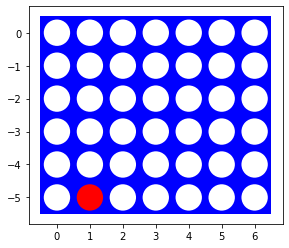

Player 2's Turn:


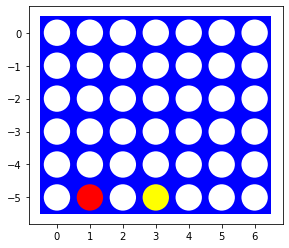

Player 1's Turn:


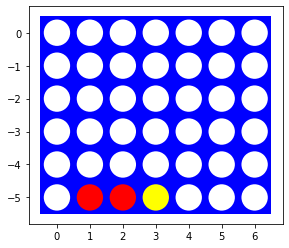

Player 2's Turn:


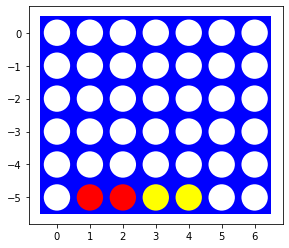

Player 1's Turn:


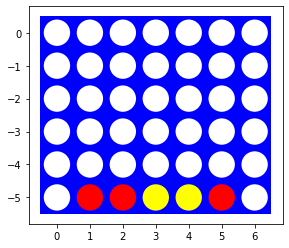

Player 2's Turn:


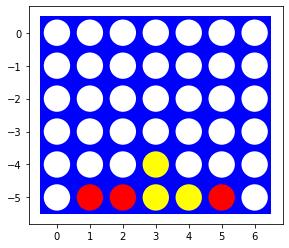

Player 1's Turn:


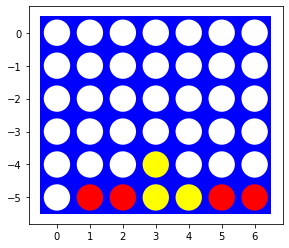

Player 2's Turn:


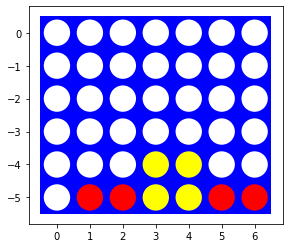

Player 1's Turn:


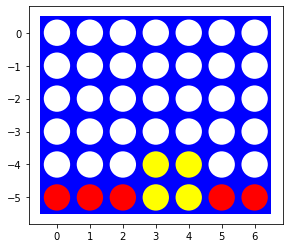

Player 2's Turn:


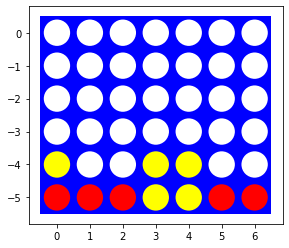

Player 1's Turn:


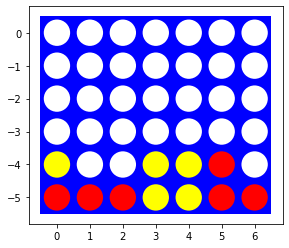

Player 2's Turn:


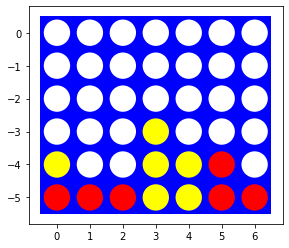

Player 1's Turn:


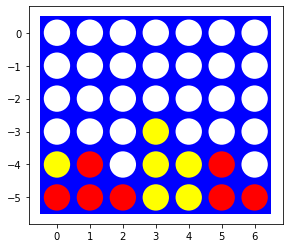

Player 2's Turn:


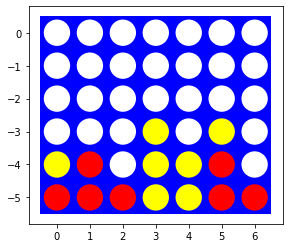

Player 1's Turn:


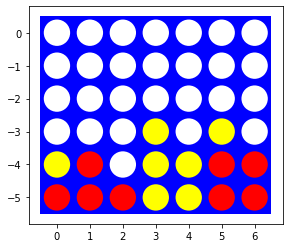

Player 2's Turn:


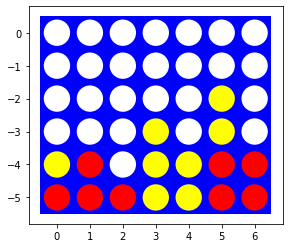

Player 1's Turn:


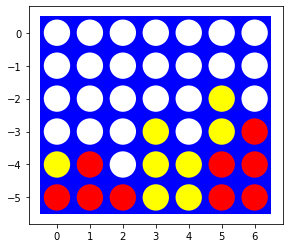

Player 2's Turn:


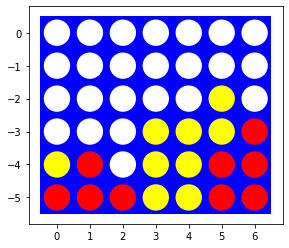

Player 1's Turn:


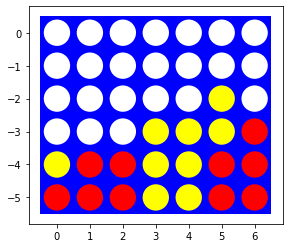

Player 2's Turn:


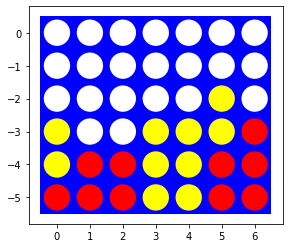

Player 1's Turn:


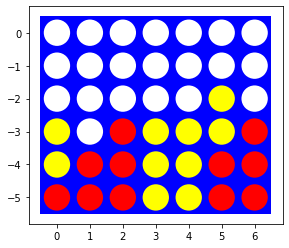

Player 2's Turn:


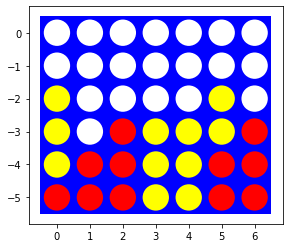

Player 1's Turn:


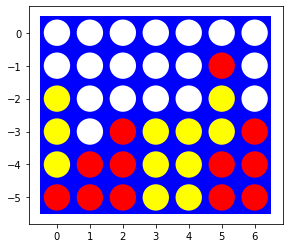

Player 2's Turn:


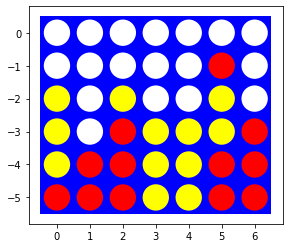

Player 1's Turn:


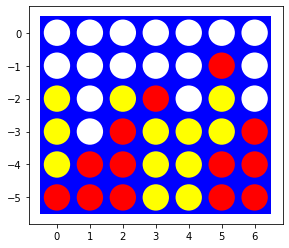

Player 1 wins!


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the number of consecutive discs required for a win
N_CONSECUTIVE = 4

# Create an empty board
def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

# Visualization of the board
def visualize(board):
    plt.axes()
    rectangle = plt.Rectangle((-0.5, len(board) * -1 + 0.5), len(board[0]), len(board), fc='blue')
    circles = []
    for i, row in enumerate(board):
        for j, val in enumerate(row):
            color = 'white' if val == 0 else 'red' if val == 1 else 'yellow'
            circles.append(plt.Circle((j, i * -1), 0.4, fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

# Check if the board has a winning condition for a given player
def check_win(board, player):
    for r in range(board.shape[0]):
        for c in range(board.shape[1]):
            if c + N_CONSECUTIVE <= board.shape[1]:
                if np.all(board[r, c:c + N_CONSECUTIVE] == player):
                    return True
            if r + N_CONSECUTIVE <= board.shape[0]:
                if np.all(board[r:r + N_CONSECUTIVE, c] == player):
                    return True
            if r + N_CONSECUTIVE <= board.shape[0] and c + N_CONSECUTIVE <= board.shape[1]:
                if all(board[r + i, c + i] == player for i in range(N_CONSECUTIVE)):
                    return True
            if r - N_CONSECUTIVE + 1 >= 0 and c + N_CONSECUTIVE <= board.shape[1]:
                if all(board[r - i, c + i] == player for i in range(N_CONSECUTIVE)):
                    return True
    return False

# Minimax agent to choose best move
class Connect4AgentMinimax:
    def __init__(self, player, heuristic_eval):
        self.player = player
        self.heuristic_eval = heuristic_eval

    def available_moves(self, board):
        return [col for col in range(board.shape[1]) if board[0, col] == 0]

    def result(self, board, player, move):
        new_board = board.copy()
        for row in range(board.shape[0] - 1, -1, -1):
            if new_board[row, move] == 0:
                new_board[row, move] = player
                break
        return new_board

    def minimax(self, board, depth, alpha, beta, maximizing_player):
        if depth == 0 or check_win(board, 1) or check_win(board, 2):
            return self.heuristic_eval(board, self.player)

        valid_moves = self.available_moves(board)
        if maximizing_player:
            max_eval = -np.inf
            for move in valid_moves:
                new_board = self.result(board, self.player, move)
                eval = self.minimax(new_board, depth - 1, alpha, beta, False)
                max_eval = max(max_eval, eval)
                alpha = max(alpha, eval)
                if beta <= alpha:
                    break
            return max_eval
        else:
            min_eval = np.inf
            for move in valid_moves:
                new_board = self.result(board, 2 if self.player == 1 else 1, move)  # If it's player 1's turn, opponent is 2
                eval = self.minimax(new_board, depth - 1, alpha, beta, True)
                min_eval = min(min_eval, eval)
                beta = min(beta, eval)
                if beta <= alpha:
                    break
            return min_eval

    def find_best_move(self, board, depth):
        valid_moves = self.available_moves(board)
        best_move = None
        max_eval = -np.inf
        for move in valid_moves:
            new_board = self.result(board, self.player, move)
            eval = self.minimax(new_board, depth - 1, -np.inf, np.inf, False)
            if eval > max_eval:
                max_eval = eval
                best_move = move
        return best_move

# Create agents with different heuristic evaluation functions
first_agent = Connect4AgentMinimax(player=1, heuristic_eval=heuristic_evaluation)
second_agent = Connect4AgentMinimax(player=2, heuristic_eval=heuristic_evaluation)

# Initialize the board
board = empty_board()

# Function to get a random valid move
def get_random_move(board):
    valid_moves = [col for col in range(board.shape[1]) if board[0, col] == 0]
    return random.choice(valid_moves)

# Alternate turns between players until the game ends
current_player = 1
while True:
    print(f"Player {current_player}'s Turn:")
    # Get a random move for the current player
    move = get_random_move(board)

    # Apply the move
    board = first_agent.result(board, 1, move) if current_player == 1 else second_agent.result(board, 2, move)

    # Visualize the board
    visualize(board)

    # Check if the game has ended
    if check_win(board, current_player):
        print(f"Player {current_player} wins!")
        break

    # Switch to the other player
    current_player = 2 if current_player == 1 else 1

    # Check for draw condition
    if len([col for col in range(board.shape[1]) if board[0, col] == 0]) == 0:
        print("Game Over: It's a draw!")
        break

## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In Monte Carlo simulation-based approach to determine the best move for a Connect Four game. The game board is represented as a 2D NumPy array, where 1 indicates Player 1's pieces, -1 represents Player 2's pieces, and 0 denotes empty slots. The terminal function checks for game-ending conditions by verifying if four consecutive pieces of the same player exist in rows, columns, or diagonals. The utility function assigns a score of 1000 for a winning configuration for the current player and -1000 for an opponent win. The result function simulates the board state after a player makes a move, while available_actions identifies valid columns for the next move.The simulate function plays out random games from a given state until a terminal condition is reached, returning the utility of the final state. The pure_monte function runs multiple simulations for each valid move to compute scores, and the move with the highest score is selected as the best option. Two predefined boards are used as examples, with the Monte Carlo method determining the optimal move for Player 1. This approach demonstrates how random simulations can evaluate potential moves, providing a probabilistic strategy for decision-making in complex game scenarios.

In [28]:
import numpy as np

# Define the number of consecutive discs required for a win
N_CONSECUTIVE = 4

# Function to check if the game has ended
def terminal(board):
    # Check rows, columns, and diagonals for a winner
    for r in range(board.shape[0]):
        for c in range(board.shape[1]):
            if board[r][c] != 0:
                player = board[r][c]
                # Horizontal check
                if c + N_CONSECUTIVE <= board.shape[1] and np.all(board[r, c:c + N_CONSECUTIVE] == player):
                    return True
                # Vertical check
                if r + N_CONSECUTIVE <= board.shape[0] and np.all(board[r:r + N_CONSECUTIVE, c] == player):
                    return True
                # Diagonal check 
                if r + N_CONSECUTIVE <= board.shape[0] and c + N_CONSECUTIVE <= board.shape[1]:
                    if np.all([board[r + i, c + i] == player for i in range(N_CONSECUTIVE)]):
                        return True
                # Diagonal check
                if r + N_CONSECUTIVE <= board.shape[0] and c - N_CONSECUTIVE >= -1:
                    if np.all([board[r + i, c - i] == player for i in range(N_CONSECUTIVE)]):
                        return True
    return False

# Function to calculate the utility of the board for the given player
def utility(board, player):
    if terminal(board):
        for r in range(board.shape[0]):
            for c in range(board.shape[1]):
                if board[r][c] != 0:
                    p = board[r][c]
                    # Check horizontal, vertical, and diagonal lines for a winner
                    if c + N_CONSECUTIVE <= board.shape[1] and np.all(board[r, c:c + N_CONSECUTIVE] == p):
                        return 1000 if p == player else -1000
                    if r + N_CONSECUTIVE <= board.shape[0] and np.all(board[r:r + N_CONSECUTIVE, c] == p):
                        return 1000 if p == player else -1000
                    if r + N_CONSECUTIVE <= board.shape[0] and c + N_CONSECUTIVE <= board.shape[1]:
                        if np.all([board[r + i, c + i] == p for i in range(N_CONSECUTIVE)]):
                            return 1000 if p == player else -1000
                    if r + N_CONSECUTIVE <= board.shape[0] and c - N_CONSECUTIVE >= -1:
                        if np.all([board[r + i, c - i] == p for i in range(N_CONSECUTIVE)]):
                            return 1000 if p == player else -1000
        return 0  # If no winner, it's a draw or unfinished
    return 0  # No win detected, return 0 for non-terminal state 

# Function to get the available actions for the current player
def available_actions(board):
    return [col for col in range(board.shape[1]) if board[0][col] == 0]

# Function to apply a move and return the resulting board
def result(board, player, action):
    row = next(r for r in range(board.shape[0] - 1, -1, -1) if board[r][action] == 0)
    new_board = board.copy()
    new_board[row][action] = player
    return new_board

# Function to simulate a random game from the current state to a terminal state
def simulate(board, player):
    while not terminal(board):
        valid_moves = available_actions(board)

        if not valid_moves:  # No valid moves left
            return utility(board, player)  # Return the utility of the current board state

        # Pick a random valid move
        move = np.random.choice(valid_moves)
        board = result(board, player, move)
        player *= -1  # Switch player

    return utility(board, player)  # Return utility when terminal state is reached

# Function for Monte Carlo simulation-based move selection
def pure_monte(board, player):
    valid_moves = available_actions(board)
    if not valid_moves:
        return None  # No valid moves available

    # Calculate the scores for each move by running simulations
    move_scores = {}
    index = 0
    while index < len(valid_moves):
        move = valid_moves[index]
        move_scores[move] = sum(simulate(result(board, player, move), player) for _ in range(num_simulations))
        index += 1

    # Choose the best move based on the scores
    best_move = max(move_scores, key=lambda x: move_scores[x])
    return best_move

# Example board configurations
manual_boards = [
    np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0],
        [0, -1, -1, 1, -1, 0, 0]
    ]),
    np.array([
        [1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0],
        [0, 0, 0, 1, -1, -1, 0],
        [0, 0, 1, -1, 1, 0, 0],
        [0, 0, 1, -1, 1, 0, 0]
    ]),
]

# Set number of simulations for Monte Carlo method
num_simulations = 5000

# Iterate through the manually defined boards
board_index = 0
while board_index < len(manual_boards):
    board = manual_boards[board_index]

    # Run the Monte Carlo method to find the best move for player 1
    best_move = pure_monte(board, player=1)

    if best_move is not None:
        new_board = result(board, player=1, action=best_move)
        print(f"Best move for player 1 on board {board_index + 1}: {best_move}")
    else:
        print(f"No valid move found for player 1 on board {board_index + 1}.\n")

    board_index += 1

Best move for player 1 on board 1: 3
Best move for player 1 on board 2: 1


### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

The optimal_first_move function determines the best initial move for a Connect Four player using a Monte Carlo simulation-based approach. Given the current game state and the player making the move (current_player), it evaluates all valid moves and selects the one with the highest expected utility. The function initializes variables optimal_move to store the best move and max_value to track the highest simulated utility value, starting with negative infinity. It iterates through the available actions, representing valid columns where the player can drop their piece. For each move, the result function simulates the resulting board state after the move is applied. The pure_monte function is then used to estimate the utility of the simulated state through multiple random simulations until terminal states are reached, assessing the expected outcome for the player. If the utility of a move exceeds the current max_value, the function updates max_value and sets optimal_move to the corresponding column. After evaluating all valid moves, the function returns the column associated with the best move. This approach uses the Monte Carlo method to identify the most promising first move, balancing probabilistic outcomes and maximizing the player's chances of a favorable result.

In [29]:
def optimal_first_move(state, current_player):
    optimal_move = None
    max_value = -np.inf

    action_index = 0
    while action_index < len(available_actions(state)):
        move = available_actions(state)[action_index]
        simulated_value = pure_monte(result(state.copy(), current_player, move), current_player)
        if max_value < simulated_value:
            max_value = simulated_value
            optimal_move = move
        action_index += 1

    return optimal_move

When it comes to Connect Four, the move that offers the player the most possibility of winning is the optimal first move. The size of the board, the depth of the search, and the opponent's strategy are few examples of variables that could affect this. Finding this ideal course of action through random simulations is the goal of the Pure Monte Carlo Search algorithm.

In conclusion, Pure Monte Carlo Search determines that the "best" first move is the one that, on average, increases the likelihood of winning the game based on simulated outcomes.
